# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

##data exploaration

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | British Airways has confirmed ...
1,✅ Trip Verified | Worst BA experience. I was s...
2,✅ Trip Verified | My daughter and I were deni...
3,✅ Trip Verified | Despite boarding being the u...
4,"Not Verified | Flight cancelled, no crew! 9th..."


In [ ]:
df.to_csv("/content/drive/MyDrive/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
def clean_review(review):
    # Split the review on the '|' character and take the second part
    parts = review.split('|', 1)

    if len(parts) > 1:
        return parts[1].strip()
    else:
        return review.strip()


In [ ]:

# Apply the clean_review function to each row in the 'reviews' column
df['reviews'] = df['reviews'].apply(clean_review)

In [ ]:
df.head()

,reviews
0,British Airways has confirmed itself as the wo...
1,Worst BA experience. I was supposed to fly out...
2,My daughter and I were denied boarding on our ...
3,Despite boarding being the usual free for all ...
4,"Flight cancelled, no crew! 9th September 2023,..."


In [ ]:
df.describe()

,reviews
count,1000
unique,1000
top,British Airways has confirmed itself as the wo...
freq,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
df.dtypes

reviews    object
dtype: object

In [ ]:
df.isna().sum()

reviews    0
dtype: int64

In [ ]:
df.shape


(1000, 1)

In [ ]:
# at topic modelling, sentiment analysis or wordclouds to

In [ ]:
pip install nltk


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:
def get_sentiment(review):
    sentiment_scores = sid.polarity_scores(review)
    sentiment = sentiment_scores['compound']
    return sentiment

df['sentiment_score'] = df['reviews'].apply(get_sentiment)


In [ ]:
# Function to map values to specific ranges
def map_values(value):
    if value <0:
        return 0
    elif value <0.2 and value>=0.1:
        return 1
    elif value <0.3 and value>=0.2:
        return 2
    elif value <0.4 and value>=0.3:
        return 3
    elif value <0.5 and value>=0.4:
        return 4
    elif value <0.6 and value>=0.5:
        return 5
    elif value <0.7 and value>=0.6:
        return 6
    elif value <0.8 and value>=0.7:
        return 7
    elif value <0.9 and value>=0.8:
        return 8
    elif value <1 and value>=0.9:
        return 9
    else:
        return 1

# Apply the function to the DataFrame column
df['sentiment_score'] = df['sentiment_score'].apply(map_values)

# Print the updated DataFrame
print(df)

                                               reviews  sentiment_score  \
0    British Airways has confirmed itself as the wo...                0   
1    Worst BA experience. I was supposed to fly out...                0   
2    My daughter and I were denied boarding on our ...                0   
3    Despite boarding being the usual free for all ...                9   
4    Flight cancelled, no crew! 9th September 2023,...                0   
..                                                 ...              ...   
995  Boston to Nairobi via London. The only good th...                3   
996  Basel to San Fransisco via Heathrow. I'm convi...                0   
997  London to Lyon. The flight has 1h 30 delay for...                0   
998  London to Boston. I was seated next to a custo...                9   
999  Stockholm to London. Standard configuration on...                9   

    sentiment_label  
0          negative  
1          negative  
2          negative  
3          

In [ ]:
def label_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)


[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

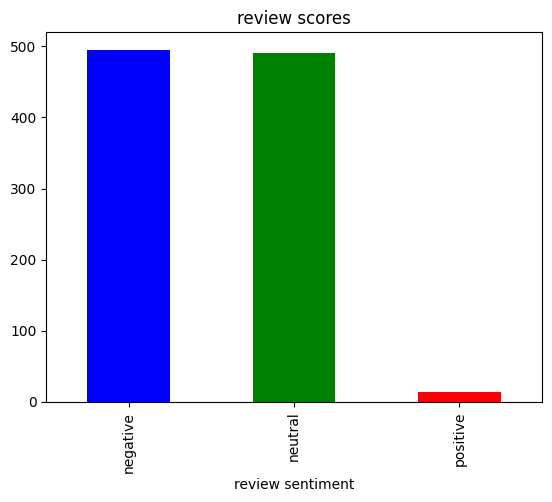

In [ ]:

color_palette = ['blue', 'green', 'red', 'yellow', 'purple']
class_names=['negative','neutral','positive']
ax=df['sentiment_label'].value_counts().plot(kind='bar', title='review scores',color=color_palette);
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)

In [ ]:
pip install wordcloud


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


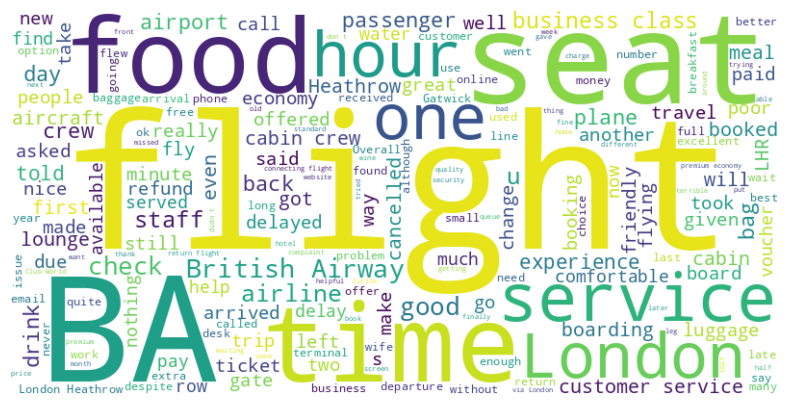

In [ ]:
# Concatenate all the cleaned reviews into one long string
all_reviews = ' '.join(df['reviews'])

# Initialize the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


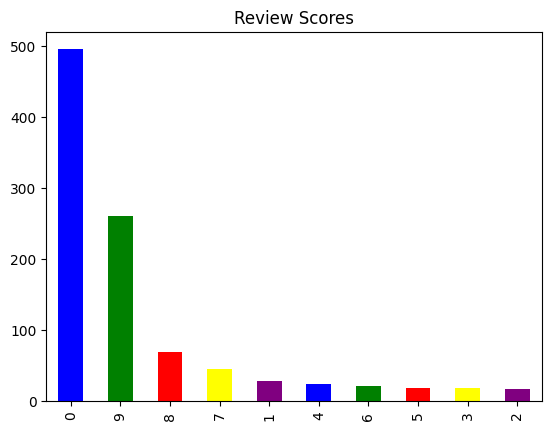

In [ ]:
import matplotlib.pyplot as plt

color_palette = ['blue', 'green', 'red', 'yellow', 'purple']

df['sentiment_score'].value_counts().plot(kind='bar', title='Review Scores', color=color_palette)

plt.show()